# MDM5063 Heart Disease Predictive & Analysis

## 1. Data Collection and Selection

### 1.1 Import Libraries/Packages

In [1]:
# Pip install commands if error occurs when importing the libraries

# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install sklearn
# !pip install imblearn
# !pip install xgboost
# !pip install -v scikit-learn
# !pip install scikit-plot

In [2]:
# Import relavant libraries/packages
import pandas as pd # Used for importing/loading dataset & data manipulation and analysis
import numpy as np # Used for working with arrays
import matplotlib.pyplot as plt # Used for data visualizations (subplots)
import seaborn as sns; sns.set() # Used for data visualizations (pairplots, countplots, boxplot, heatmap)

#from imblearn.under_sampling import RandomUnderSampler # Deal with imbalanced data
import scikitplot as skplt
from sklearn.preprocessing import LabelEncoder # Label encoding
from sklearn.preprocessing import StandardScaler # Feature standardisation 
from sklearn.model_selection import cross_validate # Cross-validation 
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split # Splitting training and testing set
from sklearn.model_selection import GridSearchCV # Hyperparameter tuning
from sklearn.pipeline import make_pipeline
from sklearn import metrics 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Model performance & evaluation
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score # Model performance & evaluation
from sklearn.metrics import confusion_matrix, classification_report # Model performance & evaluation
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression # Logistic Regression algorirthm 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance 

%matplotlib inline
# Sets the backend of matplotlib to the 'inline' backend. 
# With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. 
# The resulting plots will then also be stored in the notebook document.

### 1.2 Import/Load Dataset

In [3]:
# Import/Load dataset & Remove customerID variable
df = pd.read_csv('heart.csv')

df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


## 2. Data Preprocessing & Transformation

### 2.1 Dataset Infographics

In [4]:
# Identify feature data types and data set shape. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
# Shows descriptive stats of numeric features and also checks for outliers
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
# Show skewness and kurtusis of a particular columns
print('-----------Skewness--------------')
print(df.skew())

-----------Skewness--------------
Age            -0.195933
RestingBP       0.179839
Cholesterol    -0.610086
FastingBS       1.264484
MaxHR          -0.144359
Oldpeak         1.022872
HeartDisease   -0.215086
dtype: float64


C:\Users\jarro\AppData\Local\Temp\ipykernel_14908\3006658838.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.skew())


In [7]:
# Shows number of unique observations per column
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [8]:
# Investigate all the elements whithin each Feature 
#How many unique values are they , and what are they  ? 

#efficient and scalable way
for column in df:
    unique_values = np.unique(df[column])
    unique_count = len(unique_values)
    if unique_count <= 10:
        print("The number of values for feature {} is: {} -- {}".format(column, unique_count, unique_values))
    else:
        print("The number of values for feature {} is: {}".format(column, unique_count))

The number of values for feature Age is: 50
The number of values for feature Sex is: 2 -- ['F' 'M']
The number of values for feature ChestPainType is: 4 -- ['ASY' 'ATA' 'NAP' 'TA']
The number of values for feature RestingBP is: 67
The number of values for feature Cholesterol is: 222
The number of values for feature FastingBS is: 2 -- [0 1]
The number of values for feature RestingECG is: 3 -- ['LVH' 'Normal' 'ST']
The number of values for feature MaxHR is: 119
The number of values for feature ExerciseAngina is: 2 -- ['N' 'Y']
The number of values for feature Oldpeak is: 53
The number of values for feature ST_Slope is: 3 -- ['Down' 'Flat' 'Up']
The number of values for feature HeartDisease is: 2 -- [0 1]


In [9]:
# Display unique values for each feature.
def unique_values():
    for col in df:
        print(col)
        print(df[col].unique(), '\n')

unique_values()

Age
[40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71] 

Sex
['M' 'F'] 

ChestPainType
['ATA' 'NAP' 'ASY' 'TA'] 

RestingBP
[140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164] 

Cholesterol
[289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331 341 243 279 198 249 168 603
 159 190 185 290 212 231 222 235 320 187 266 287

### 2.2 Remove Whitespaces, Missing/Null values, and Outliers (Data Imputation)

In [10]:
# Identify number of missing (null) values in the dataset.
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [11]:
# Replace any whitespace values with NaN
df = df.replace(r'\s+$', np.nan, regex=True)

# Replace any wild characters (symbols) with NaN
wild_chars = ['?', '-', '.', '_', '*']
for i in wild_chars:
    df[df == i] = np.nan

# Print number of null values 
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [12]:
# Replace 0 with median for Cholesterol & RestingBP (median imputation).
df['Cholesterol'].replace(0, df['Cholesterol'].median(), inplace = True)
df['RestingBP'].replace(0, df['RestingBP'].median(), inplace = True)

df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.538126,240.581699,0.233115,136.809368,0.887364,0.553377
std,9.432617,17.990127,53.982967,0.423046,25.460334,1.066570,0.497414
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


- Removing outliers is a bit complicated and controversial because there are data that are real but are considered as outliers and removing them would make our model overfitting. 
- But, there are also errors when putting the values, for example in cholesterol and RestingBP, it have values 0 and it is something that it is not possible, but to have high cholesterol or RestingBP, yes.
- Hence, in this case, I will transform the data that is 0 using median imputation. 

### 2.3 Feature Conversion/Cleansing (Data Manipulation (For Better EDA Visualizations Only))

In [13]:
# Replace 0 and 1 with "N" and "Y" in HeartDisease feature
df.HeartDisease = df.HeartDisease.replace({1:'Y', 0:'N'})

# Replace 0 and 1 with "Normal" and "Diabetic" in FastingBS feature
df.FastingBS = df.FastingBS.replace({1:'Diabetic', 0:'Normal'})

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,Normal,Normal,172,N,0.0,Up,N
1,49,F,NAP,160,180,Normal,Normal,156,N,1.0,Flat,Y
2,37,M,ATA,130,283,Normal,ST,98,N,0.0,Up,N
3,48,F,ASY,138,214,Normal,Normal,108,Y,1.5,Flat,Y
4,54,M,NAP,150,195,Normal,Normal,122,N,0.0,Up,N


In [14]:
unique_values()

Age
[40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71] 

Sex
['M' 'F'] 

ChestPainType
['ATA' 'NAP' 'ASY' 'TA'] 

RestingBP
[140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116 144 154 134 104 139 131 141 178 146 158 123 102  96 143
 172 156 114 127 101 174  94 148 117 192 129 164] 

Cholesterol
[289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331 341 243 279 198 249 168 603
 159 190 185 290 212 231 222 235 320 187 266 287 404

In [15]:
# Export cleaned dataframe to csv file
df.to_csv('HeartDisease_Cleaned.csv')

## 3. Exploratory Data Analysis (EDA)

### 3.1 Distribution of Heart Disease

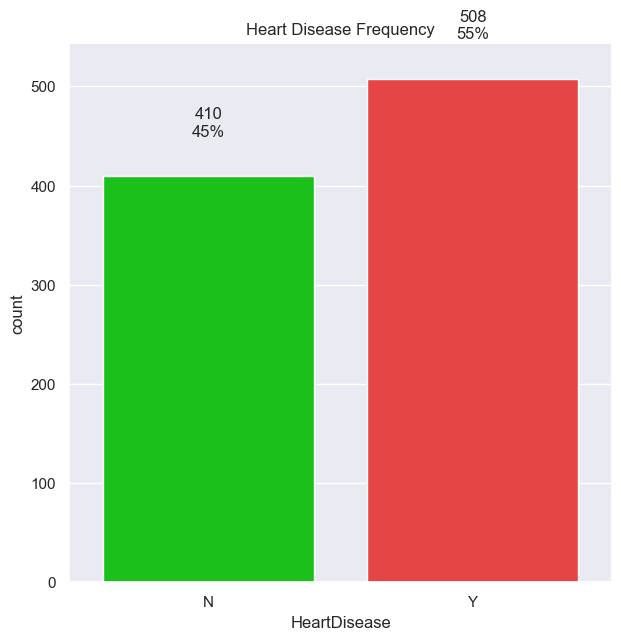

In [16]:
# Define colors
lightgreen = '#00db00'
red = '#ff2b2b'

# Instantiate figure to render plot on
plt.figure(figsize=(7, 7));

# Draw countplot of Heart Disease frequency
ax_vc = sns.countplot(x='HeartDisease', palette=[lightgreen, red], data=df);

# Display percentages above each bar so that the sum per value equals 100%
bars = ax_vc.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]
for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    ax_vc.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0f}\n{1:.0%}'.format(height_l, height_l/total), ha="center")
    ax_vc.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0f}\n{1:.0%}'.format(height_r, height_r/total), ha="center")
plt.margins(0.07)
# Display title
plt.title('Heart Disease Frequency');

plt.show()

- The target variable seems pretty balanced.

### 3.2 Distribution of Numerical Features  

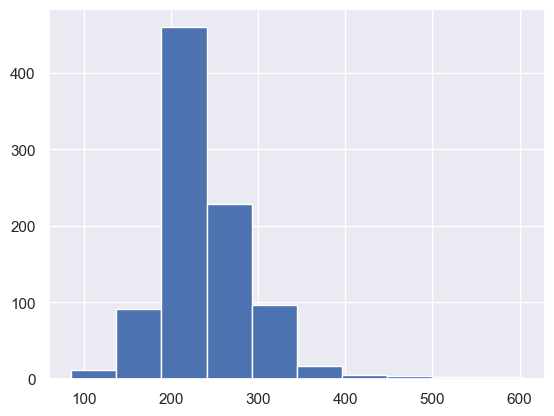

In [17]:
#Since age is skewed to the right from  before, lets analyse further
# Histogram for age 
fig, ax= plt.subplots()
ax = plt.hist(df['Cholesterol'])
plt.show()

- Cholesterol shows a right-skewed distribution histogram.
- Although it is not normally distributed, humans are still able to develop high-levels of cholesterol of values ranging between 500-600.
- Hence, this project will not deal with the complications of such values.

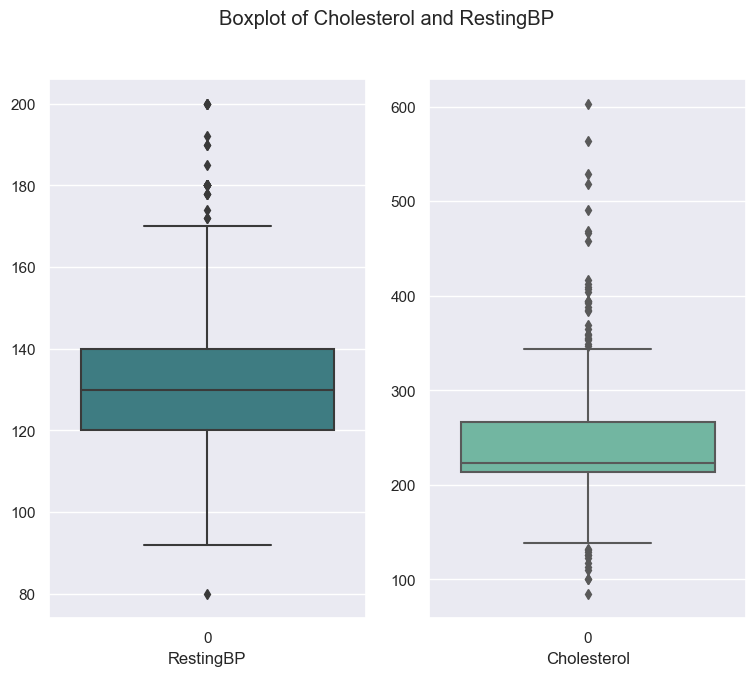

In [18]:
# Boxplot to check for outliers
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 7))
fig.suptitle("Boxplot of Cholesterol and RestingBP")

sns.boxplot(data=df['Cholesterol'], orient="v", palette="Set2")
ax[1].set_xlabel("Cholesterol")

sns.boxplot(data=df['RestingBP'], orient='v', palette="crest", ax=ax[0])
ax[0].set_xlabel("RestingBP")

plt.tight_layout;
plt.show()

- This is similar to RestingBP; where humans are still able to have low-levels of resting blood pressure of 80.
- Hence, this project will not deal with the complications of such values.

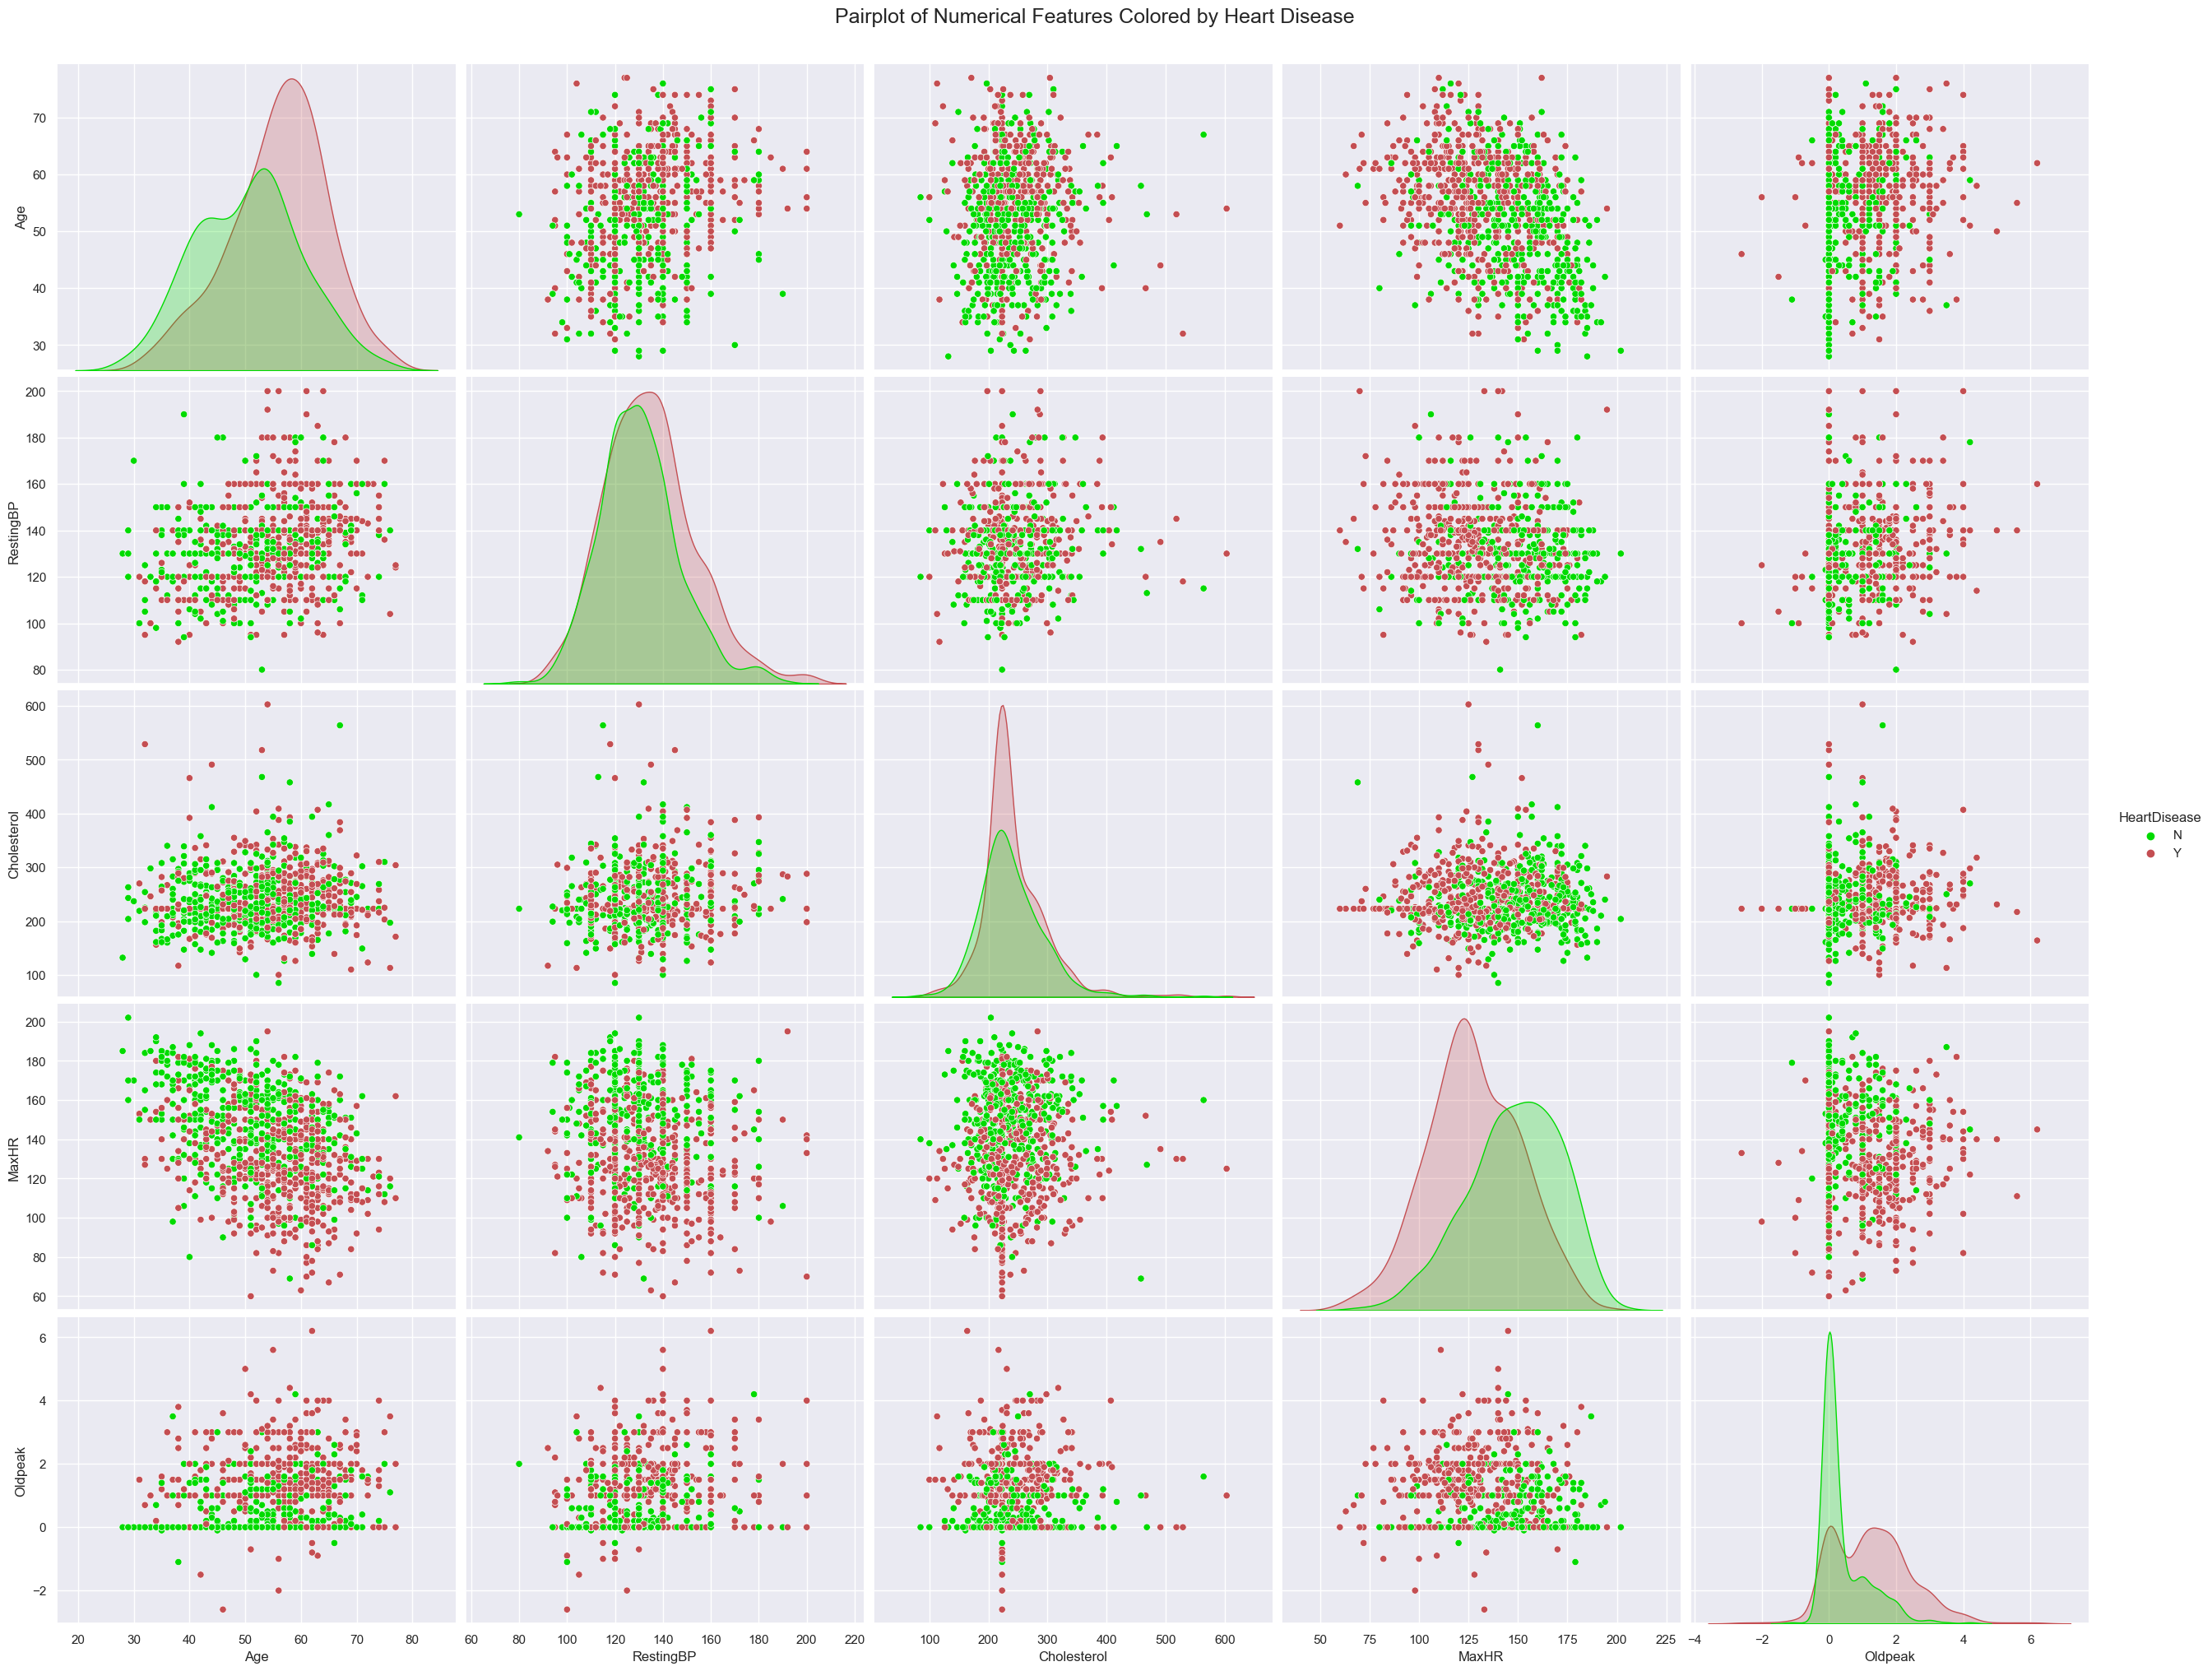

In [19]:
# Plot pairwise relationships between numerical features colored by Heart Disease
g = sns.pairplot(df, hue='HeartDisease', palette=[lightgreen, 'r'], height=4, aspect=1.3);

# Display parent title for figures
g.fig.suptitle('Pairplot of Numerical Features Colored by Heart Disease', y=1.02, fontsize=18);

# Display plot
plt.show()

### 3.3 Heart Disease by Categorical Features 

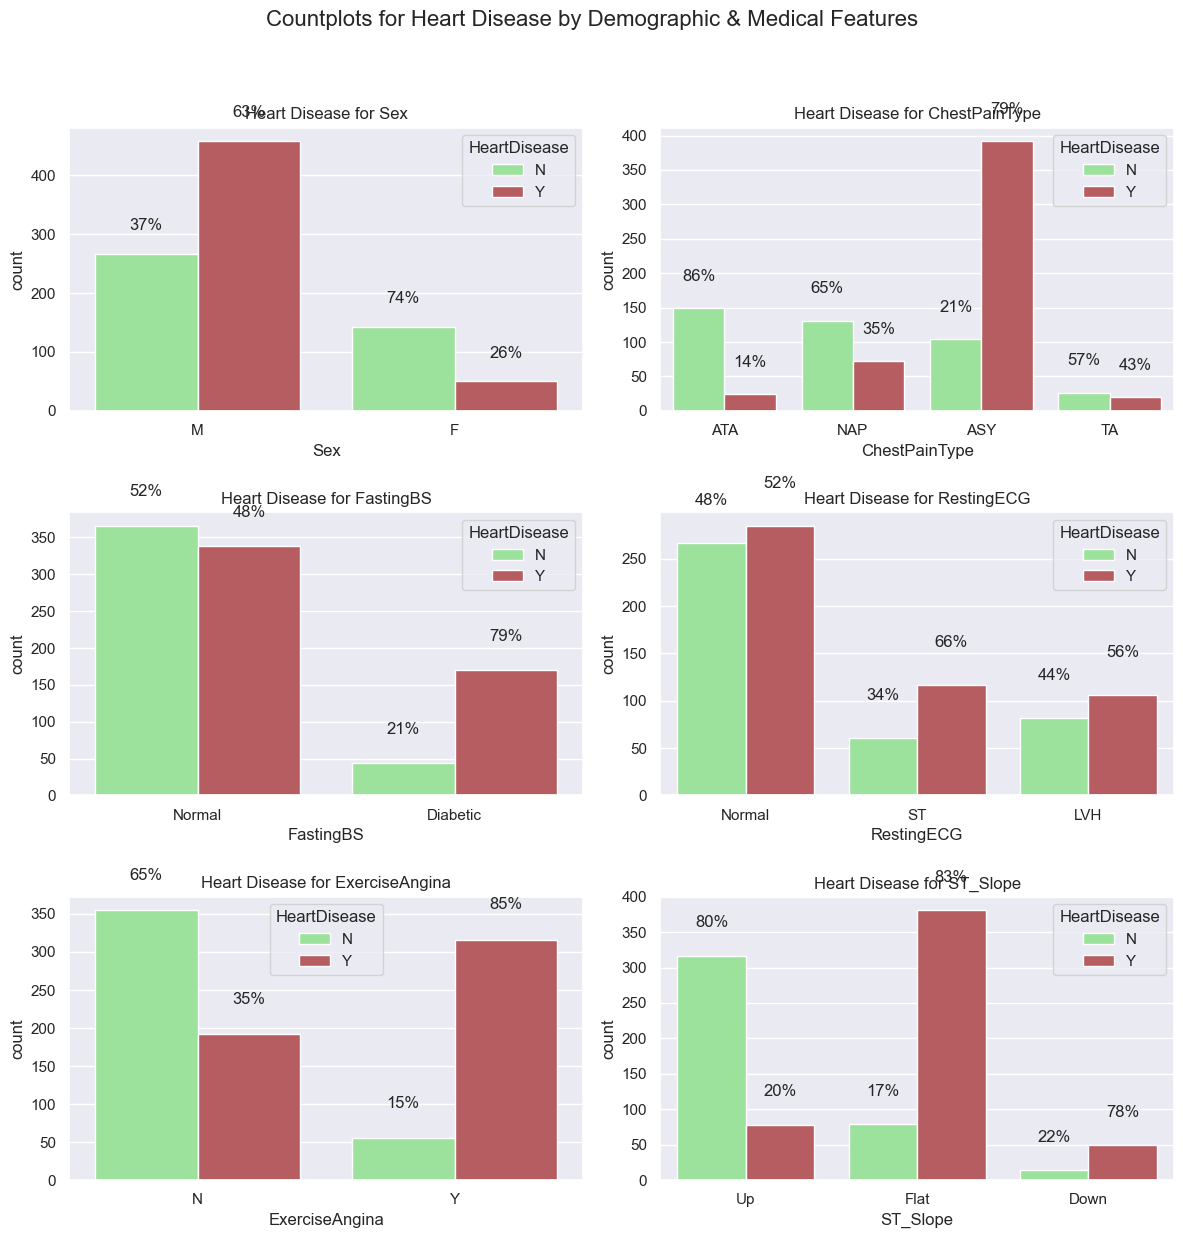

In [20]:
# Categorical demographic features
demo_cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Instantiate figure to render plots on
fig8 = plt.figure(figsize=(12, 12))

# Figure title
fig8.suptitle('Countplots for Heart Disease by Demographic & Medical Features', y=1.03, fontsize=16);
    
# Loop through demographic features and draw plots
for col, i in zip(demo_cols, range(1, len(demo_cols) + 1)):
    plt.subplot(3, 2, i);
    ax = sns.countplot(x=col, hue='HeartDisease', palette=['lightgreen', 'r'], data=df);

    # Display percentages above each bar so that the sum per value equals 100%
    bars = ax.patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]

    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r

        ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
        ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

    # Set title
    plt.title('Heart Disease for ' + col);
    
# Display plot
plt.tight_layout()
plt.show()

### 3.4 Label Encoding & Creating Dummy Features

In [21]:
# Change binary into 0&1 and Create dummies for categorical 

# list of binary variables
bin_var = [col for col in df.columns if len(df[col].unique()) == 2]

# list of categorical variables
cat_var = [col for col in df.select_dtypes(['object']).columns.tolist() if col not in bin_var]

# Apply Label Encoding for binaries
le = LabelEncoder()
for col in bin_var:
  df[col] = le.fit_transform(df[col])

# Apply get_dummies for categorical
df_encoded = pd.get_dummies(df, columns = cat_var, drop_first = True)

df_encoded.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,1,172,0,0.0,0,1,0,0,1,0,0,1
1,49,0,160,180,1,156,0,1.0,1,0,1,0,1,0,1,0
2,37,1,130,283,1,98,0,0.0,0,1,0,0,0,1,0,1
3,48,0,138,214,1,108,1,1.5,1,0,0,0,1,0,1,0
4,54,1,150,195,1,122,0,0.0,0,0,1,0,1,0,0,1


In [22]:
# Display unique values for each feature.
def unique_values2():
    for col in df_encoded:
        print(col)
        print(df_encoded[col].unique(), '\n')

unique_values2()

Age
[40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71] 

Sex
[1 0] 

RestingBP
[140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116 144 154 134 104 139 131 141 178 146 158 123 102  96 143
 172 156 114 127 101 174  94 148 117 192 129 164] 

Cholesterol
[289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331 341 243 279 198 249 168 603
 159 190 185 290 212 231 222 235 320 187 266 287 404 312 251 328 285 280
 192 193 308 219 257 132

### 3.5 Heatmap of Correlation Coefficients 

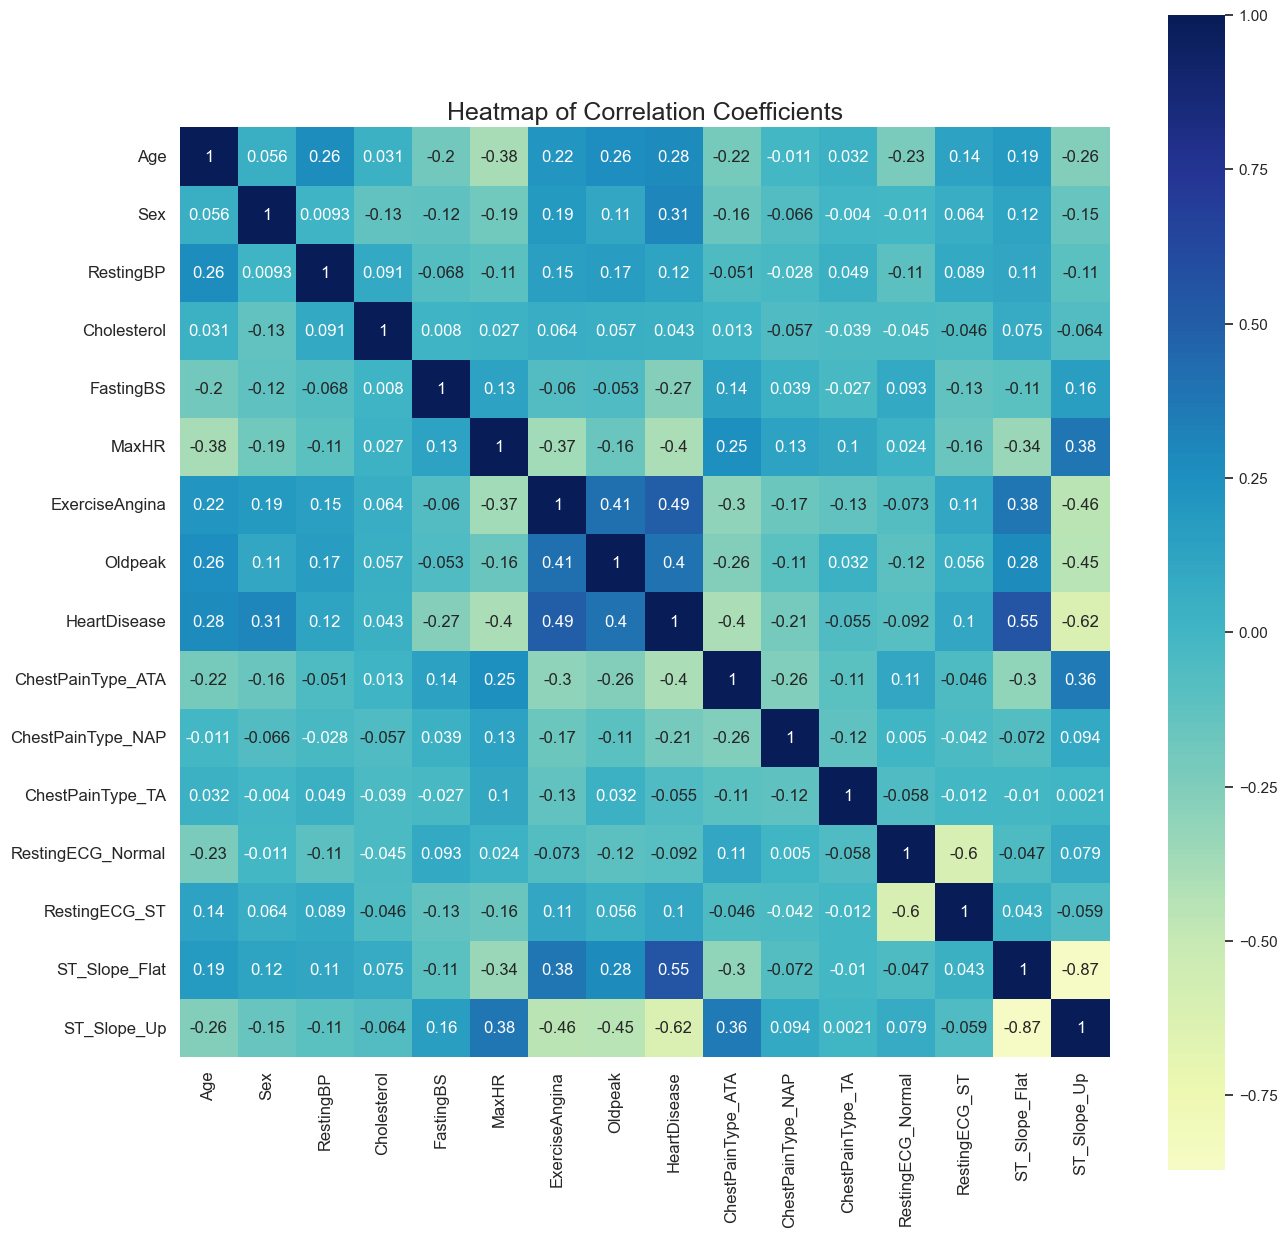

In [23]:
# Correlation

# Instantiate a mask for the weak correlations
weak_corr = ((0.5 > df_encoded.corr()) & (df_encoded.corr() > -0.50))

# Instantiate figure to render subsequent plot on
plt.figure(figsize=(15, 15))

# Draw masked heatmap
sns.heatmap(df_encoded.corr(), 
            xticklabels=df_encoded.corr().columns, 
            yticklabels=df_encoded.corr().columns,
            center=0,
            cmap="YlGnBu",
            square=True,
            annot=True,
#             mask=weak_corr,
            cbar=True)

# Set x and y tick (feature name) font sizes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Heatmap of Correlation Coefficients', fontsize=18)

# Display plot
plt.show()

In [24]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   Sex                918 non-null    int32  
 2   RestingBP          918 non-null    int64  
 3   Cholesterol        918 non-null    int64  
 4   FastingBS          918 non-null    int32  
 5   MaxHR              918 non-null    int64  
 6   ExerciseAngina     918 non-null    int32  
 7   Oldpeak            918 non-null    float64
 8   HeartDisease       918 non-null    int32  
 9   ChestPainType_ATA  918 non-null    uint8  
 10  ChestPainType_NAP  918 non-null    uint8  
 11  ChestPainType_TA   918 non-null    uint8  
 12  RestingECG_Normal  918 non-null    uint8  
 13  RestingECG_ST      918 non-null    uint8  
 14  ST_Slope_Flat      918 non-null    uint8  
 15  ST_Slope_Up        918 non-null    uint8  
dtypes: float64(1), int32(4), i

In [25]:
# Export cleaned dataframe to csv file
df_encoded.to_csv('HeartDisease_Encoded.csv')

## 4. Data Modeling (Predictive Modeling) & Evaluation 

### 4.1 Split Train & Test Sets 

In [26]:
# Feature matrix
X = df_encoded.drop(['HeartDisease', 'Oldpeak'], axis=1)

# Target vector
y = df_encoded['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [27]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

### 4.2 Supervised Machine Learning Models

In [28]:
dt = DecisionTreeClassifier()
lr = LogisticRegression()
rf = RandomForestClassifier()
xgb = XGBClassifier()

model = []
cross_val = []
accuracy = []
for i in (dt, lr, rf, xgb):
  model.append(i.__class__.__name__)
  cross_val.append(cross_validate(i, X_train, y_train, scoring='accuracy'))
  
for d in range(len(cross_val)):
  accuracy.append(cross_val[d]['test_score'].mean())

model_accuracy = pd.DataFrame
pd.DataFrame(data=accuracy, index=model, columns=['Accuracy'])

,Accuracy
DecisionTreeClassifier,0.780493
LogisticRegression,0.866244
RandomForestClassifier,0.860457
XGBClassifier,0.841542


### 4.3 Hyperparameter Tuning 

In [29]:
model_params = {
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params' : {
            'decisiontreeclassifier__criterion': ['gini', 'entropy'],
            'decisiontreeclassifier__max_depth': [1, 2, 3, 5, 7, 9, 10, 15, 20, 25]
        }  
    },
    'Logistic Regression' : {
        'model': LogisticRegression(solver = 'liblinear', multi_class = 'auto'),
        'params': {
            'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
        }
    },
    'Random Forest' : {
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__max_depth': [1, 3, 5, 8, 10],
            'randomforestclassifier__min_samples_leaf': [1, 2, 5, 10],
            'randomforestclassifier__min_samples_split': [2, 5, 10, 15, 100],
            'randomforestclassifier__n_estimators': [10, 30, 50, 80, 100]
        }
    },
    'XGBoost' : {
        'model': XGBClassifier(),
        'params': {
            'xgbclassifier__n_estimators': [10, 30, 50, 80, 100],
            'xgbclassifier__max_depth': [1, 3, 5, 8, 10],
            'xgbclassifier__learning_rate': [0.0001, 0.01, 0.1, 1]
        }
    },
}

In [30]:
scores = []
best_estimators = {}

for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    clf =  GridSearchCV(pipe, mp['params'], cv = cv, return_train_score = False)
    clf.fit(X_train, y_train)
    scores.append({
        'Model': algo,
        'Score': clf.best_score_,
        'Best Parameters': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df_model_train = pd.DataFrame(scores,columns=['Model','Score','Best Parameters'])
df_model_train

,Model,Score,Best Parameters
0,Decision Tree,0.837234,"{'decisiontreeclassifier__criterion': 'gini', ..."
1,Logistic Regression,0.864898,{'logisticregression__C': 10}
2,Random Forest,0.870652,"{'randomforestclassifier__max_depth': 8, 'rand..."
3,XGBoost,0.866347,"{'xgbclassifier__learning_rate': 0.1, 'xgbclas..."


In [31]:
best_estimators

{'Decision Tree': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('decisiontreeclassifier',
                  DecisionTreeClassifier(max_depth=3))]),
 'Logistic Regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=10, solver='liblinear'))]),
 'Random Forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(max_depth=8, min_samples_leaf=2))]),
 'XGBoost': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('xgbclassifier',
                  XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                                colsample_bylevel=1, colsample_bynode=1,
                                colsample_bytree=1, early_stopping_rounds=None,
                                enable_categorical=False, eval_metric=None,
                                gam

### 4.4 Visualize Performance on Test Set

Decision Tree Classification Report

              precision    recall  f1-score   support

           0       0.76      0.72      0.74        92
           1       0.82      0.85      0.83       138

    accuracy                           0.80       230
   macro avg       0.79      0.78      0.79       230
weighted avg       0.79      0.80      0.79       230

Decision Tree Classification Assessment Score
Accuracy:              0.80
Misclassification:     0.20
Precision:             0.82
Recall:                0.85
F1-Score:              0.83



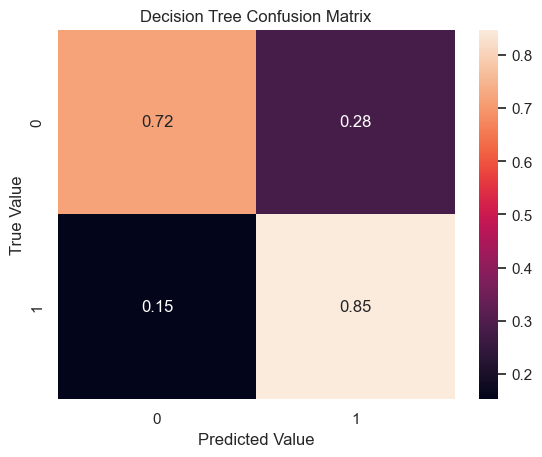

In [32]:
# Decision Tree Model on Test Set
dt = best_estimators['Decision Tree']
dt.fit(X_train, y_train)

# Prediction
X_test_dt = scaler.transform(X_test)
y_pred_dt = dt.predict(X_test_dt)

# Classification Report
print('Decision Tree Classification Report\n')
print(classification_report(y_test, y_pred_dt))

accuracy_dt = np.round(accuracy_score(y_test, y_pred_dt), 2)
misclassification_dt = np.round(1-accuracy_dt, 2)
precision_dt = np.round(precision_score(y_test, y_pred_dt), 2)
recall_dt = np.round(recall_score(y_test, y_pred_dt), 2)
f1_score_dt = np.round(f1_score(y_test, y_pred_dt), 2)

print('Decision Tree Classification Assessment Score')
print('Accuracy:              {0:.2f}'.format(accuracy_dt))
print('Misclassification:     {0:.2f}'.format(misclassification_dt))
print('Precision:             {0:.2f}'.format(precision_dt))
print('Recall:                {0:.2f}'.format(recall_dt))
print('F1-Score:              {0:.2f}\n'.format(f1_score_dt))

# Confusion Matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_dt, normalize='true'), annot=True, ax=ax)
ax.set_title('Decision Tree Confusion Matrix')
ax.set_ylabel('True Value')
ax.set_xlabel('Predicted Value')

plt.show()

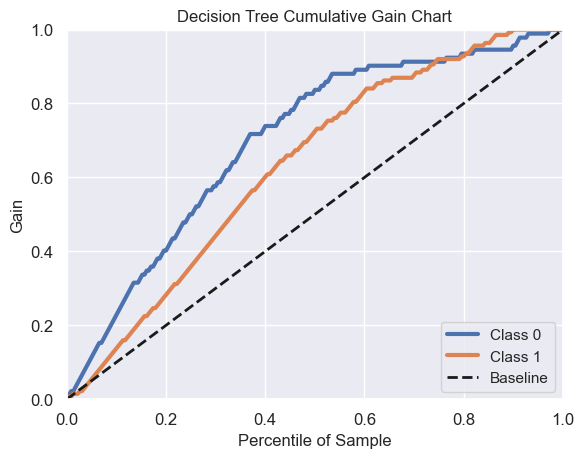

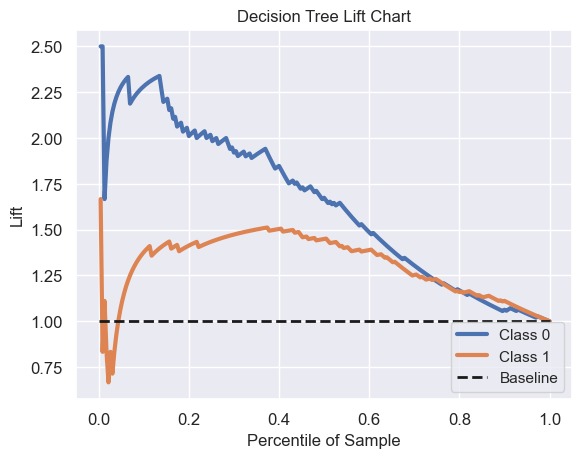

In [33]:
# Decision Tree Cumulative Gain Chart & Lift Chart

# Predict the class probabilities
y_pred_dt_proba = dt.predict_proba(X_test_dt)

# Plot cumulative gain chart
skplt.metrics.plot_cumulative_gain(y_test, y_pred_dt_proba)

# Add legend information
plt.xlabel('Percentile of Sample')
plt.ylabel('Gain')
plt.title('Decision Tree Cumulative Gain Chart')
plt.legend(loc="lower right")

# Plot lift chart
skplt.metrics.plot_lift_curve(y_test, y_pred_dt_proba)

# Add legend information
plt.xlabel('Percentile of Sample')
plt.ylabel('Lift')
plt.title('Decision Tree Lift Chart')
plt.legend(loc="lower right")

Logistic Regression Classification Report

              precision    recall  f1-score   support

           0       0.79      0.71      0.75        92
           1       0.82      0.88      0.85       138

    accuracy                           0.81       230
   macro avg       0.81      0.79      0.80       230
weighted avg       0.81      0.81      0.81       230

Logistic Regression Classification Assessment Score
Accuracy:              0.81
Misclassification:     0.19
Precision:             0.82
Recall:                0.88
F1-Score:              0.85



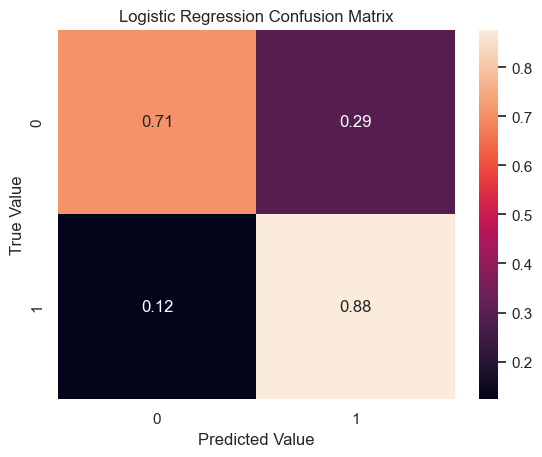

In [34]:
# Logistic Regression Model on Test Set
lr = best_estimators['Logistic Regression']
lr.fit(X_train, y_train)

# Prediction
X_test_lr = scaler.transform(X_test)
y_pred_lr = lr.predict(X_test_lr)

# Classification Report
print('Logistic Regression Classification Report\n')
print(classification_report(y_test, y_pred_lr))

accuracy_lr = np.round(accuracy_score(y_test, y_pred_lr), 2)
misclassification_lr = np.round(1-accuracy_lr, 2)
precision_lr = np.round(precision_score(y_test, y_pred_lr), 2)
recall_lr = np.round(recall_score(y_test, y_pred_lr), 2)
f1_score_lr = np.round(f1_score(y_test, y_pred_lr), 2)

print('Logistic Regression Classification Assessment Score')
print('Accuracy:              {0:.2f}'.format(accuracy_lr))
print('Misclassification:     {0:.2f}'.format(misclassification_lr))
print('Precision:             {0:.2f}'.format(precision_lr))
print('Recall:                {0:.2f}'.format(recall_lr))
print('F1-Score:              {0:.2f}\n'.format(f1_score_lr))

# Confusion Matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_lr, normalize='true'), annot=True, ax=ax)
ax.set_title('Logistic Regression Confusion Matrix')
ax.set_ylabel('True Value')
ax.set_xlabel('Predicted Value')

plt.show()

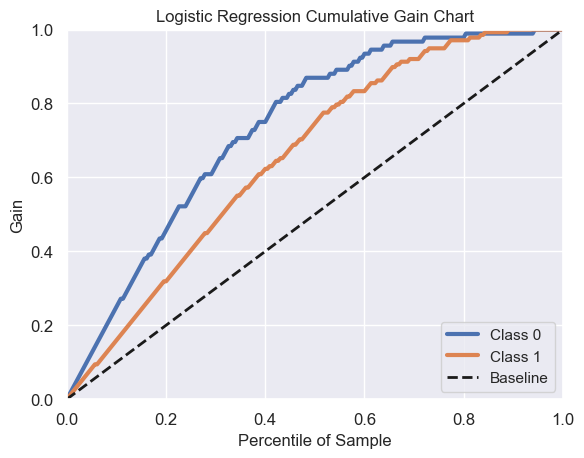

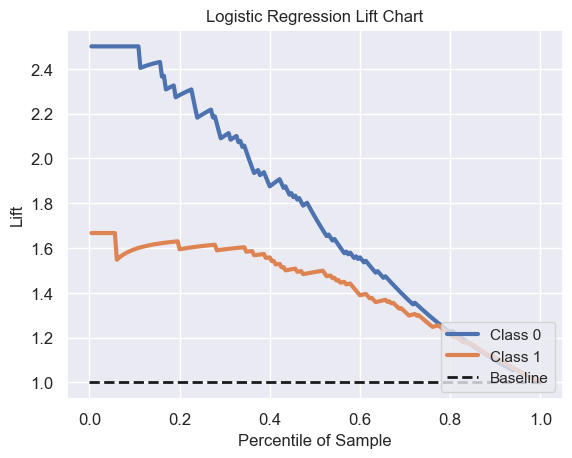

In [35]:
# Logistic Regression Cumulative Gain Chart & Lift Chart

# Predict the class probabilities
y_pred_lr_proba = lr.predict_proba(X_test_lr)

# Plot cumulative gain chart
skplt.metrics.plot_cumulative_gain(y_test, y_pred_lr_proba)

# Add legend information
plt.xlabel('Percentile of Sample')
plt.ylabel('Gain')
plt.title('Logistic Regression Cumulative Gain Chart')
plt.legend(loc="lower right")

# Plot lift chart
skplt.metrics.plot_lift_curve(y_test, y_pred_lr_proba)

# Add legend information
plt.xlabel('Percentile of Sample')
plt.ylabel('Lift')
plt.title('Logistic Regression Lift Chart')
plt.legend(loc="lower right")

Random Forest Classification Report

              precision    recall  f1-score   support

           0       0.80      0.79      0.80        92
           1       0.86      0.87      0.87       138

    accuracy                           0.84       230
   macro avg       0.83      0.83      0.83       230
weighted avg       0.84      0.84      0.84       230

Random Forest Classification Assessment Score
Accuracy:              0.84
Misclassification:     0.16
Precision:             0.86
Recall:                0.87
F1-Score:              0.87



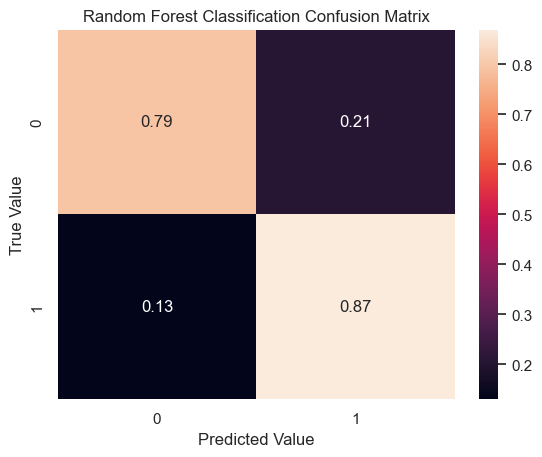

In [36]:
# Random Forest Model on Test Set
rf = best_estimators['Random Forest']
rf.fit(X_train, y_train)

# Prediction
X_test_rf = scaler.transform(X_test)
y_pred_rf = rf.predict(X_test_rf)

# Classification Report
print('Random Forest Classification Report\n')
print(classification_report(y_test, y_pred_rf))

accuracy_rf = np.round(accuracy_score(y_test, y_pred_rf), 2)
misclassification_rf = np.round(1-accuracy_rf, 2)
precision_rf = np.round(precision_score(y_test, y_pred_rf), 2)
recall_rf = np.round(recall_score(y_test, y_pred_rf), 2)
f1_score_rf = np.round(f1_score(y_test, y_pred_rf), 2)

print('Random Forest Classification Assessment Score')
print('Accuracy:              {0:.2f}'.format(accuracy_rf))
print('Misclassification:     {0:.2f}'.format(misclassification_rf))
print('Precision:             {0:.2f}'.format(precision_rf))
print('Recall:                {0:.2f}'.format(recall_rf))
print('F1-Score:              {0:.2f}\n'.format(f1_score_rf))

# Confusion Matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_rf, normalize='true'), annot=True, ax=ax)
ax.set_title('Random Forest Classification Confusion Matrix')
ax.set_ylabel('True Value')
ax.set_xlabel('Predicted Value')

plt.show()

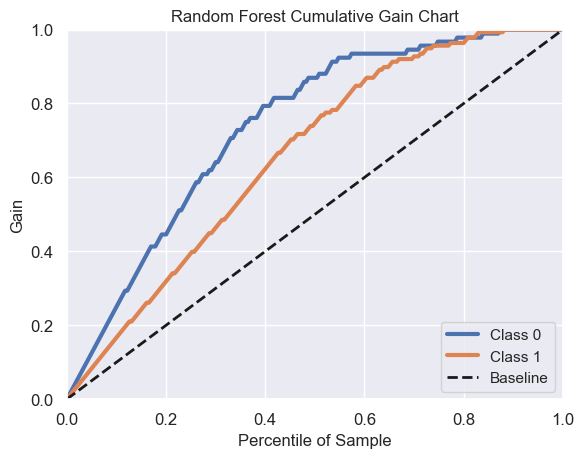

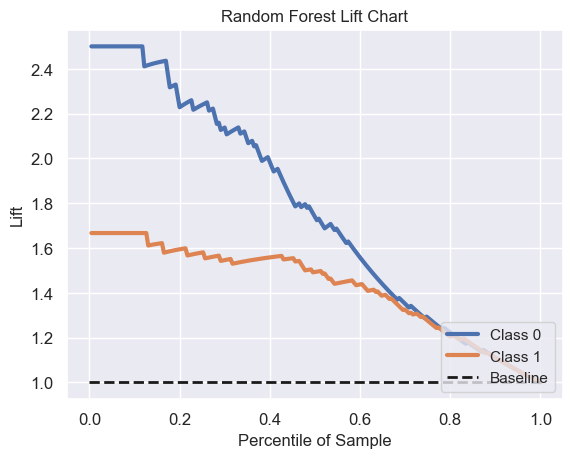

In [37]:
# Random Forest Cumulative Gain Chart & Lift Chart

# Predict the class probabilities
y_pred_rf_proba = rf.predict_proba(X_test_rf)

# Plot cumulative gain chart
skplt.metrics.plot_cumulative_gain(y_test, y_pred_rf_proba)

# Add legend information
plt.xlabel('Percentile of Sample')
plt.ylabel('Gain')
plt.title('Random Forest Cumulative Gain Chart')
plt.legend(loc="lower right")

# Plot lift chart
skplt.metrics.plot_lift_curve(y_test, y_pred_rf_proba)

# Add legend information
plt.xlabel('Percentile of Sample')
plt.ylabel('Lift')
plt.title('Random Forest Lift Chart')
plt.legend(loc="lower right")

XGBoost Classification Report

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        92
           1       0.83      0.83      0.83       138

    accuracy                           0.79       230
   macro avg       0.78      0.78      0.78       230
weighted avg       0.79      0.79      0.79       230

XGBoost Classification Assessment Score
Accuracy:              0.79
Misclassification:     0.21
Precision:             0.83
Recall:                0.83
F1-Score:              0.83



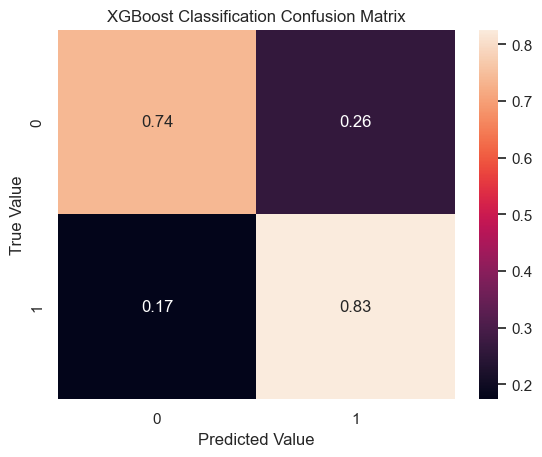

In [38]:
# XGBoost Model on Test Set
xgb = best_estimators['XGBoost']
xgb.fit(X_train, y_train)

# Prediction
X_test_xgb = scaler.transform(X_test)
y_pred_xgb = xgb.predict(X_test_xgb)

# Classification Report
print('XGBoost Classification Report\n')
print(classification_report(y_test, y_pred_xgb))

accuracy_xgb = np.round(accuracy_score(y_test, y_pred_xgb), 2)
misclassification_xgb = np.round(1-accuracy_xgb, 2)
precision_xgb = np.round(precision_score(y_test, y_pred_xgb), 2)
recall_xgb = np.round(recall_score(y_test, y_pred_xgb), 2)
f1_score_xgb = np.round(f1_score(y_test, y_pred_xgb), 2)

print('XGBoost Classification Assessment Score')
print('Accuracy:              {0:.2f}'.format(accuracy_xgb))
print('Misclassification:     {0:.2f}'.format(misclassification_xgb))
print('Precision:             {0:.2f}'.format(precision_xgb))
print('Recall:                {0:.2f}'.format(recall_xgb))
print('F1-Score:              {0:.2f}\n'.format(f1_score_xgb))

# Confusion Matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_xgb, normalize='true'), annot=True, ax=ax)
ax.set_title('XGBoost Classification Confusion Matrix')
ax.set_ylabel('True Value')
ax.set_xlabel('Predicted Value')

plt.show()

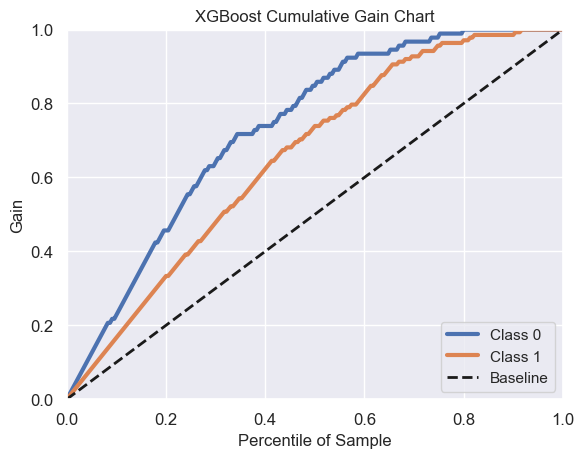

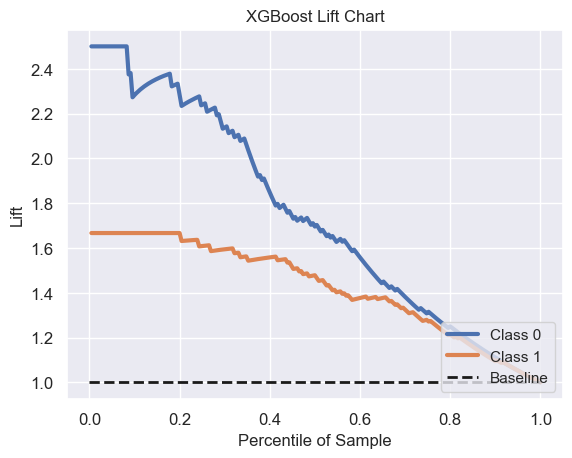

In [39]:
# XGBoost Cumulative Gain Chart & Lift Chart

# Predict the class probabilities
y_pred_xgb_proba = xgb.predict_proba(X_test_xgb)

# Plot cumulative gain chart
skplt.metrics.plot_cumulative_gain(y_test, y_pred_xgb_proba)

# Add legend information
plt.xlabel('Percentile of Sample')
plt.ylabel('Gain')
plt.title('XGBoost Cumulative Gain Chart')
plt.legend(loc="lower right")

# Plot lift chart
skplt.metrics.plot_lift_curve(y_test, y_pred_xgb_proba)

# Add legend information
plt.xlabel('Percentile of Sample')
plt.ylabel('Lift')
plt.title('XGBoost Lift Chart')
plt.legend(loc="lower right")

### 4.5 Model Comparison and Evaluation

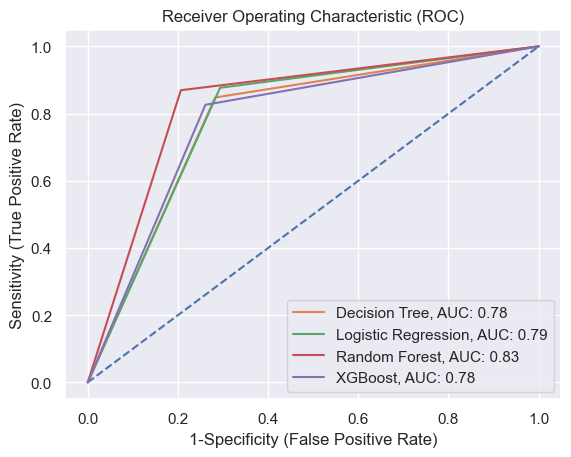

In [40]:
# Derive ROC AUC scores of each model
auc_dt = np.round(roc_auc_score(y_test, y_pred_dt), 2)
auc_lr = np.round(roc_auc_score(y_test, y_pred_lr), 2)
auc_rf = np.round(roc_auc_score(y_test, y_pred_rf), 2)
auc_xgb = np.round(roc_auc_score(y_test, y_pred_xgb), 2)

# Initiate the plots of ROC charts for each model
plt.figure(0).clf()
plt.plot([0, 1], ls="--")

# Fit Decision Tree model and plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_dt)
plt.plot(fpr,tpr,label='Decision Tree, AUC: '+ str(auc_dt))

# Fit Logistic Regression model and plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_lr)
plt.plot(fpr,tpr,label='Logistic Regression, AUC: '+ str(auc_lr))

# Fit Random Forest model and plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_rf)
plt.plot(fpr,tpr,label='Random Forest, AUC: '+ str(auc_rf))

# Fit XGBoost model and plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_xgb)
plt.plot(fpr,tpr,label='XGBoost, AUC: '+ str(auc_xgb))

#add legend information
plt.xlabel('1-Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

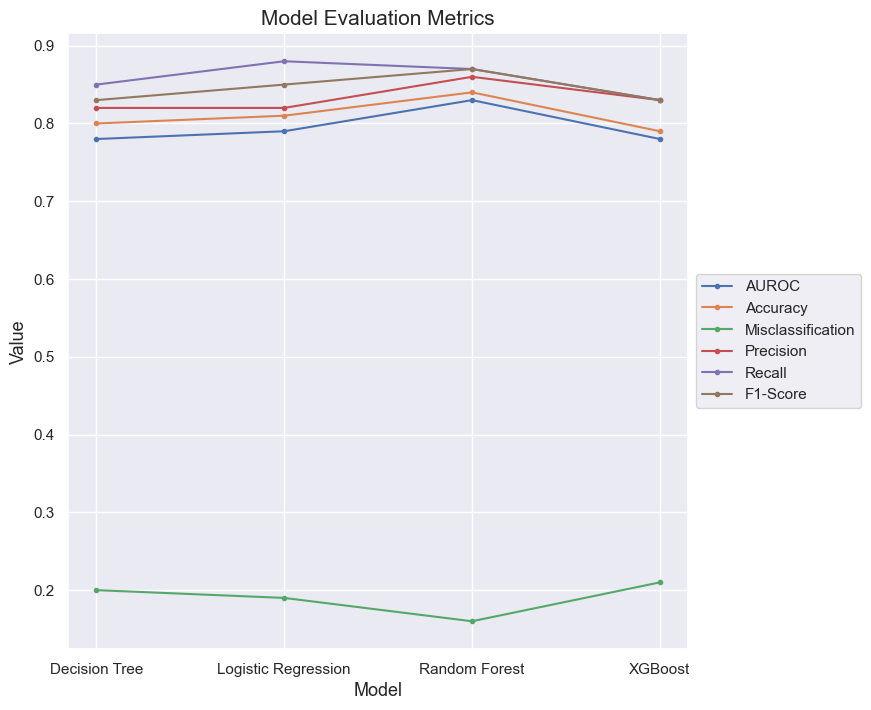

,AUROC,Accuracy,Misclassification,Precision,Recall,F1-Score
Decision Tree,0.78,0.80,0.20,0.82,0.85,0.83
Logistic Regression,0.79,0.81,0.19,0.82,0.88,0.85
Random Forest,0.83,0.84,0.16,0.86,0.87,0.87
XGBoost,0.78,0.79,0.21,0.83,0.83,0.83


In [41]:
# Dataframe of final models' evaluation metrics 

df_final = pd.DataFrame(
    data=[
        {'AUROC':auc_dt, 'Accuracy':accuracy_dt, 'Misclassification':misclassification_dt, 'Precision':precision_dt, 'Recall':recall_dt, 'F1-Score':f1_score_dt},
        {'AUROC':auc_lr, 'Accuracy':accuracy_lr, 'Misclassification':misclassification_lr, 'Precision':precision_lr, 'Recall':recall_lr, 'F1-Score':f1_score_lr},
        {'AUROC':auc_rf, 'Accuracy':accuracy_rf, 'Misclassification':misclassification_rf, 'Precision':precision_rf, 'Recall':recall_rf, 'F1-Score':f1_score_rf},
        {'AUROC':auc_xgb, 'Accuracy':accuracy_xgb, 'Misclassification':misclassification_xgb, 'Precision':precision_xgb, 'Recall':recall_xgb, 'F1-Score':f1_score_xgb}
        ],
        index=[
            'Decision Tree',
            'Logistic Regression',
            'Random Forest',
            'XGBoost'
        ])


# Plot metrics
plt.figure(figsize=(8, 8));
N = len(df_final.index)
ind = np.arange(N)
for model in list(df_final.columns):
    plt.plot(ind, df_final[model].values, linewidth=1.5, marker='.', label=model)
plt.xticks(
    ticks=np.arange(N),
    labels=['Decision Tree', 'Logistic Regression', 'Random Forest', 'XGBoost'])
plt.title('Model Evaluation Metrics', fontsize=15)
plt.ylabel('Value', fontsize=13)
plt.xlabel('Model', fontsize=13)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.show()

df_final

- The best model overall based on the evaluation metrics is the Random Forest classifier.

In [42]:
# Export ML Performance Scores dataframe to csv file
df_final.to_csv('HeartDisease_MLPerformance.csv')

#### 4.5.1 Interpret the Best Model

Random Forest Classification Report

              precision    recall  f1-score   support

           0       0.77      0.75      0.76        92
           1       0.84      0.85      0.84       138

    accuracy                           0.81       230
   macro avg       0.80      0.80      0.80       230
weighted avg       0.81      0.81      0.81       230

Random Forest Classification Assessment Score
Accuracy:              0.81
Misclassification:     0.19
Precision:             0.84
Recall:                0.85
F1-Score:              0.84



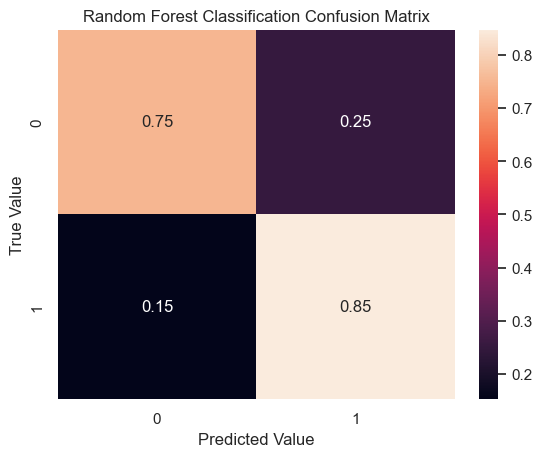

In [43]:
# Random Forest Model on Test Set
rf = best_estimators['Random Forest']
rf.fit(X_train, y_train)

# Prediction
X_test_rf = scaler.transform(X_test)
y_pred_rf = rf.predict(X_test_rf)

# Classification Report
print('Random Forest Classification Report\n')
print(classification_report(y_test, y_pred_rf))

accuracy_rf = np.round(accuracy_score(y_test, y_pred_rf), 2)
misclassification_rf = np.round(1-accuracy_rf, 2)
precision_rf = np.round(precision_score(y_test, y_pred_rf), 2)
recall_rf = np.round(recall_score(y_test, y_pred_rf), 2)
f1_score_rf = np.round(f1_score(y_test, y_pred_rf), 2)

print('Random Forest Classification Assessment Score')
print('Accuracy:              {0:.2f}'.format(accuracy_rf))
print('Misclassification:     {0:.2f}'.format(misclassification_rf))
print('Precision:             {0:.2f}'.format(precision_rf))
print('Recall:                {0:.2f}'.format(recall_rf))
print('F1-Score:              {0:.2f}\n'.format(f1_score_rf))

# Confusion Matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_rf, normalize='true'), annot=True, ax=ax)
ax.set_title('Random Forest Classification Confusion Matrix')
ax.set_ylabel('True Value')
ax.set_xlabel('Predicted Value')

plt.show()

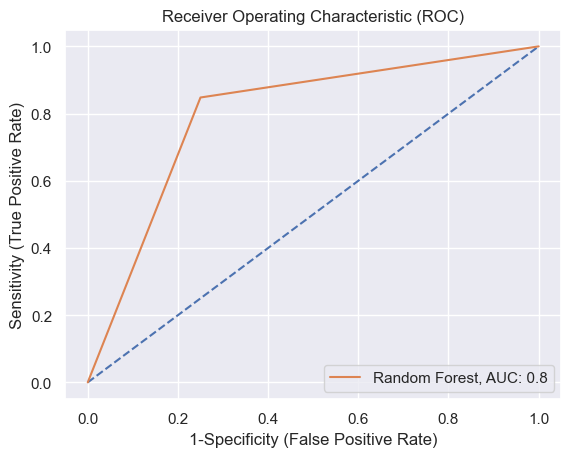

In [44]:
# Derive ROC AUC scores of the best model
auc_rf = np.round(roc_auc_score(y_test, y_pred_rf), 2)

# Initiate the plots of ROC charts for each model
plt.figure(0).clf()
plt.plot([0, 1], ls="--")

# Fit SVC model and plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_rf)
plt.plot(fpr,tpr,label='Random Forest, AUC: '+ str(auc_rf))

#add legend information
plt.xlabel('1-Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

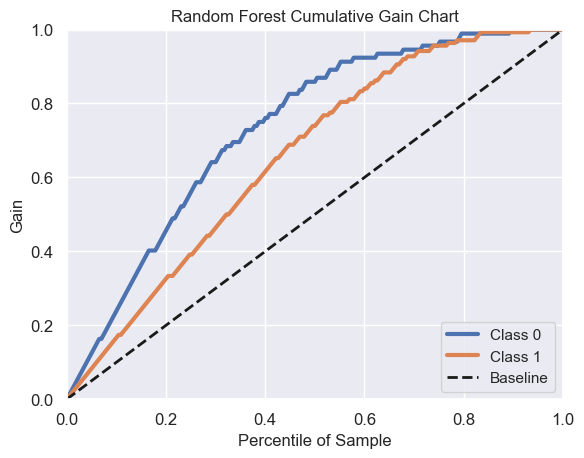

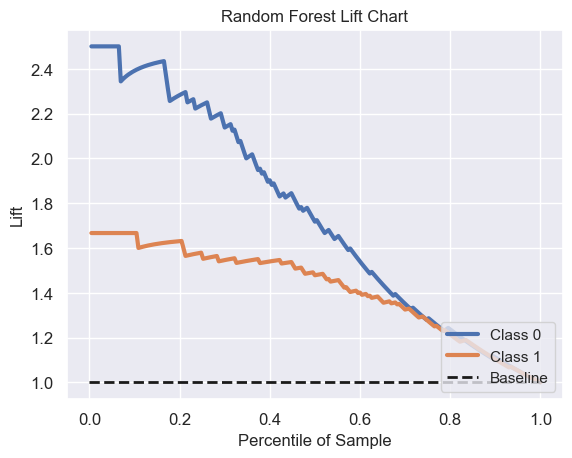

In [45]:
# Random Forest Cumulative Gain Chart & Lift Chart

# Predict the class probabilities
y_pred_rf_proba = rf.predict_proba(X_test_rf)

# Plot cumulative gain chart
skplt.metrics.plot_cumulative_gain(y_test, y_pred_rf_proba)

# Add legend information
plt.xlabel('Percentile of Sample')
plt.ylabel('Gain')
plt.title('Random Forest Cumulative Gain Chart')
plt.legend(loc="lower right")

# Plot lift chart
skplt.metrics.plot_lift_curve(y_test, y_pred_rf_proba)

# Add legend information
plt.xlabel('Percentile of Sample')
plt.ylabel('Lift')
plt.title('Random Forest Lift Chart')
plt.legend(loc="lower right")

In [46]:
# See the best parameters for the Random Forest Model
best_estimators['Random Forest']

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=8, min_samples_leaf=2))])

In [47]:
# Running Feature Importance
data = df_encoded

rf = RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=30)
rf.fit(X_test_rf, y_test) 

fi_col = []
fi = []

for i,column in enumerate(df_encoded.drop(['HeartDisease', 'Oldpeak'], axis = 1)):
    print('The feature importance for {} is : {}'.format(column, rf.feature_importances_[i]))
    
    fi_col.append(column)
    fi.append(rf.feature_importances_[i])

The feature importance for Age is : 0.10565389923173896
The feature importance for Sex is : 0.07046813167161729
The feature importance for RestingBP is : 0.10186846308461954
The feature importance for Cholesterol is : 0.13423044379804636
The feature importance for FastingBS is : 0.03317269253854557
The feature importance for MaxHR is : 0.16210105477208223
The feature importance for ExerciseAngina is : 0.07731925244988959
The feature importance for ChestPainType_ATA is : 0.04702674953495194
The feature importance for ChestPainType_NAP is : 0.03797153876343551
The feature importance for ChestPainType_TA is : 0.009858003062660742
The feature importance for RestingECG_Normal is : 0.02510661586871967
The feature importance for RestingECG_ST is : 0.01585983320338017
The feature importance for ST_Slope_Flat is : 0.0683459563037933
The feature importance for ST_Slope_Up is : 0.11101736571651932


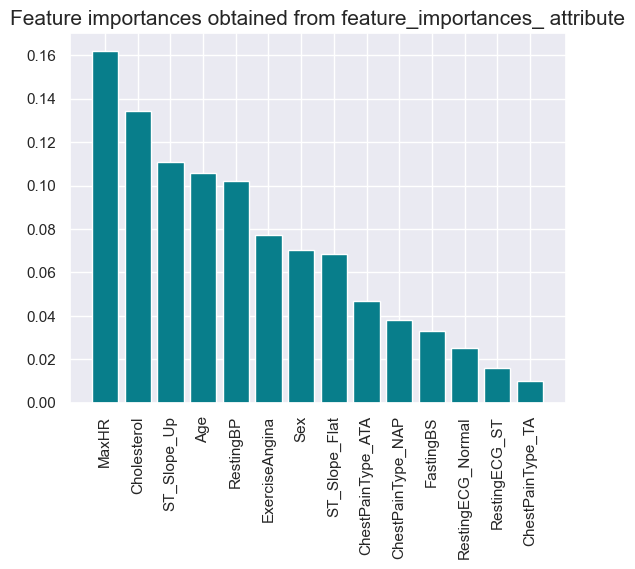

In [48]:
# Plot Feature Importance Chart
importances_rf = pd.DataFrame(data={
    'Attribute': X.columns,
    'Importance': rf.feature_importances_
})
importances_rf = importances_rf.sort_values(by='Importance', ascending=False)

plt.bar(x=importances_rf['Attribute'], height=importances_rf['Importance'], color='#087E8B')
plt.title('Feature importances obtained from feature_importances_ attribute', size=15)
plt.xticks(rotation='vertical')
plt.show()

#### 4.5.2 Save the Best Model

In [49]:
# !pip install joblib
import joblib 

best_clf = best_estimators['Random Forest']

# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

Defaulting to user installation because normal site-packages is not writeable


['saved_model.pkl']

## 5. Deployment (Prediction)

In [96]:
# Creating a function for prediction

def predict_heartdisease(Age, Sex, RestingBP, Cholesterol, FastingBS, MaxHR, ExerciseAngina, ChestPainType_ATA, ChestPainType_NAP, 
                     ChestPainType_TA, RestingECG_Normal, RestingECG_ST, ST_Slope_Flat, ST_Slope_Up):
    age = int(Age)
    sex = int(Sex)
    rest_bp = int(RestingBP)
    choles = int(Cholesterol)
    fast_bs = int(FastingBS)
    max_hr = int(MaxHR)
    ex_ang = int(ExerciseAngina)
    chest_ata = int(ChestPainType_ATA)
    chest_nap = int(ChestPainType_NAP)
    chest_ta = int(ChestPainType_TA)
    rest_ecg_nor = int(RestingECG_Normal)
    rest_ecg_st = int(RestingECG_ST)
    st_slope_flat = int(ST_Slope_Flat)
    st_slope_up = int(ST_Slope_Up)

    x = [[age, sex, rest_bp, choles, fast_bs, max_hr, ex_ang, chest_ata, chest_nap, chest_ta, rest_ecg_nor, rest_ecg_st, st_slope_flat, st_slope_up]]
    x = scaler.transform(x)
        
    return rf.predict(x)

### 5.1 Prediction 1

In [105]:
# Prediction 1
# Input sequence: Age, Sex, RestingBP, Cholesterol, FastingBS, MaxHR, ExerciseAngina, ChestPainType_ATA, ChestPainType_NAP, 
#                 ChestPainType_TA, RestingECG_Normal, RestingECG_ST, ST_Slope_Flat, ST_Slope_Up

prediction = predict_heartdisease(60, 0, 130, 300, 1, 150, 1, 1, 0, 0, 1, 0, 1, 0)[0]
if prediction:
  print('Oops! You have heart disease.')
else:
  print("Great! You don't have heart disease.")

Oops! You have heart disease.


C:\Users\jarro\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### 5.2 Prediction 2

In [106]:
# Prediction 2
# Input sequence: Age, Sex, RestingBP, Cholesterol, FastingBS, MaxHR, ExerciseAngina, ChestPainType_ATA, ChestPainType_NAP, 
#                 ChestPainType_TA, RestingECG_Normal, RestingECG_ST, ST_Slope_Flat, ST_Slope_Up

prediction = predict_heartdisease(77, 1, 200, 600, 1, 160, 0, 0, 0, 0, 1, 0, 0, 1)[0]
if prediction:
  print('Oops! You have heart disease.')
else:
  print("Great! You don't have heart disease.")

Great! You don't have heart disease.


C:\Users\jarro\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
